In [2]:
#preprocess step...

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')



# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]



#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()




# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)



# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)


# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)



# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')



# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)



#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)


# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

    
    
# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

    
#NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print (df)




Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64
         Year     Month  Monthly Anomaly  Monthly Unc  Annual Anomaly  \
0     0.00000  0.000000         0.085570          367               0   
1     0.00000  0.090909         0.439494          396               0   
2     0.00000  0.181818         0.430886          417               0   
3     0.00000  0.272727         0.245570          391               0   
4     0.00000  0.363636         0.313418          384               0   
...       ...       ...              ...          ...             ...   
2068  0.99422  0.363636         0.921013            0             935   
2072  0.99422  0.727273         0.982785            0               0   
2074  0

In [3]:

#perform the Descriptive Statistics calculations for the "Monthly Anomaly" column.

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')



# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]



#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()




# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)



# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)


# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)



# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')



# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)



#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)


# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

    
    
# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

    
#NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# CALCULATE STATISTICS FOR "Monthly Anomaly" COLUMN
monthly_anomaly_stats = df['Monthly Anomaly'].describe()

# CALCULATE MEDIAN
monthly_anomaly_median = df['Monthly Anomaly'].median()

# CALCULATE STANDARED DEVIATION
monthly_anomaly_std = df['Monthly Anomaly'].std()

# CALCULATE QUANTILES(25th, 50th, 75th percentiles)
monthly_anomaly_quantiles = df['Monthly Anomaly'].quantile([0.25, 0.50, 0.75])


print("Monthly Anomaly Descriptive Statistics:")
print(monthly_anomaly_stats)
print("\nMedian:", monthly_anomaly_median)
print("Standard Deviation:", monthly_anomaly_std)
print("Quantiles:")
print(monthly_anomaly_quantiles)


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64
Monthly Anomaly Descriptive Statistics:
count    2034.000000
mean        0.499244
std         0.197196
min         0.000000
25%         0.361139
50%         0.466582
75%         0.605443
max         1.000000
Name: Monthly Anomaly, dtype: float64

Median: 0.46658227848101264
Standard Deviation: 0.19719552430000692
Quantiles:
0.25    0.361139
0.50    0.466582
0.75    0.605443
Name: Monthly Anomaly, dtype: float64


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


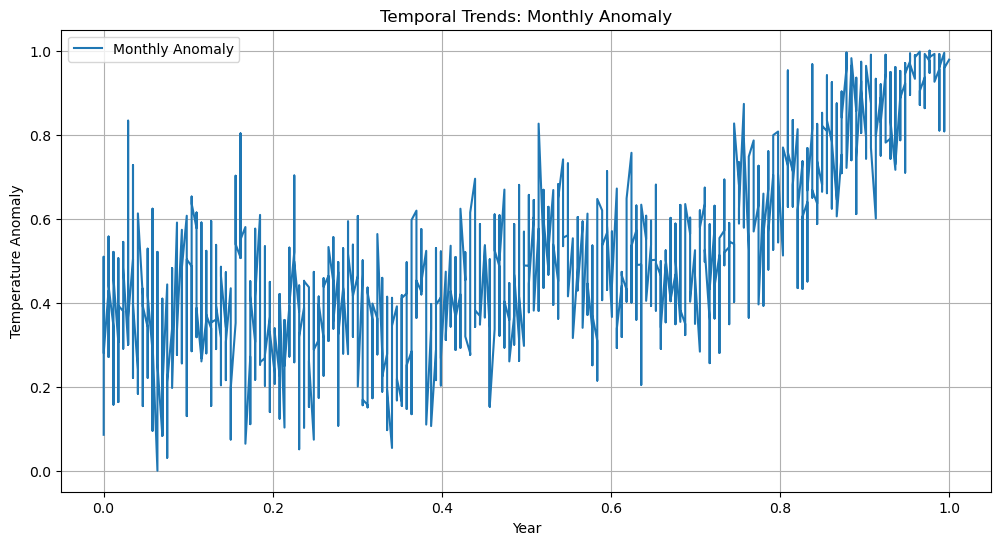

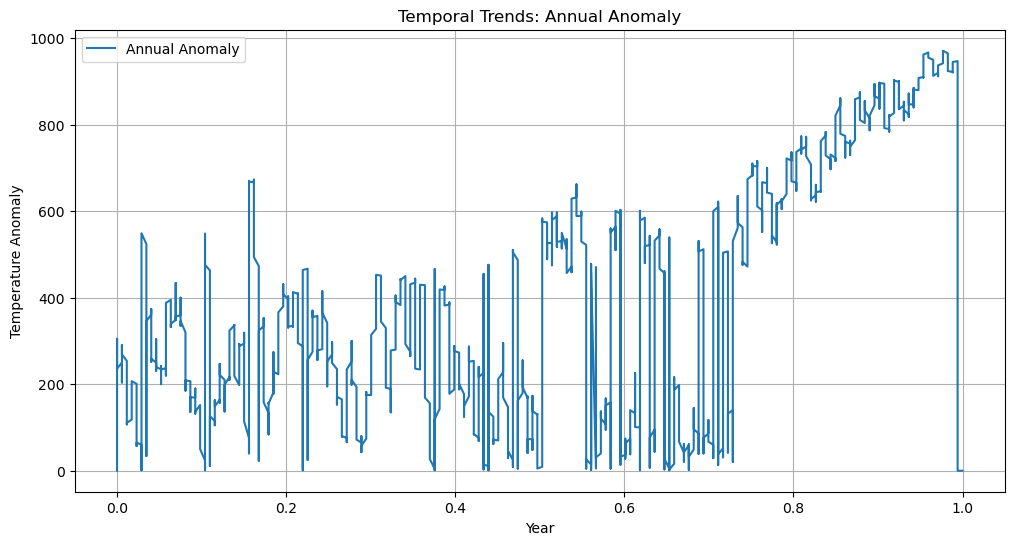

In [4]:
#perform Temporal Trends analysis and create line charts for "Monthly Anomaly" and "Annual Anomaly"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# TEMPORAL TRENDS: PLOT LINE CHART OF "Monthly Anomaly" and "Annual Anomaly"
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Monthly Anomaly'], label='Monthly Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temporal Trends: Monthly Anomaly')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Annual Anomaly'], label='Annual Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temporal Trends: Annual Anomaly')
plt.legend()
plt.grid()
plt.show()


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


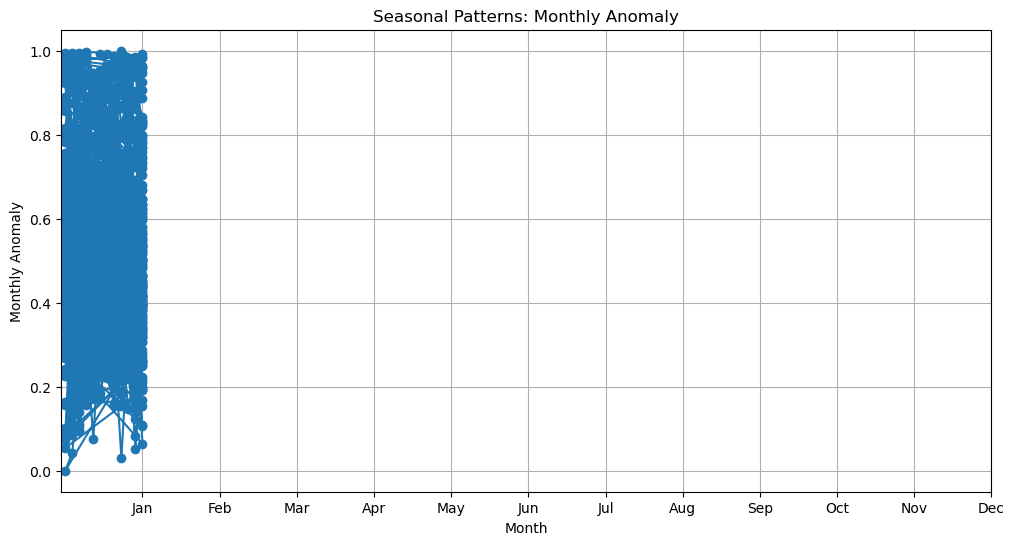

In [9]:
#analyze seasonal patterns by creating a line chart of "Monthly Anomaly" against months

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# SEASONAL  PATTERNS: LINE CHART OF "Monthly Anomaly"AGAINST MONTH
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Monthly Anomaly'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Monthly Anomaly')
plt.title('Seasonal Patterns: Monthly Anomaly')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


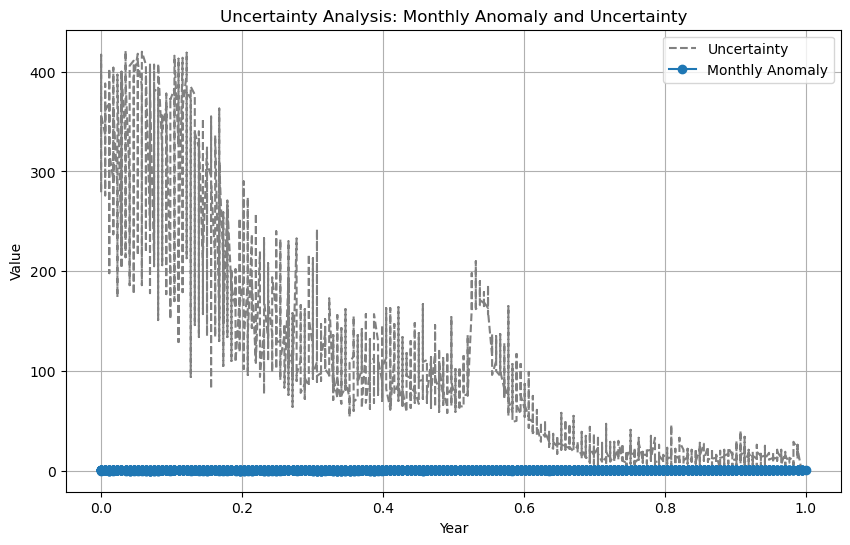

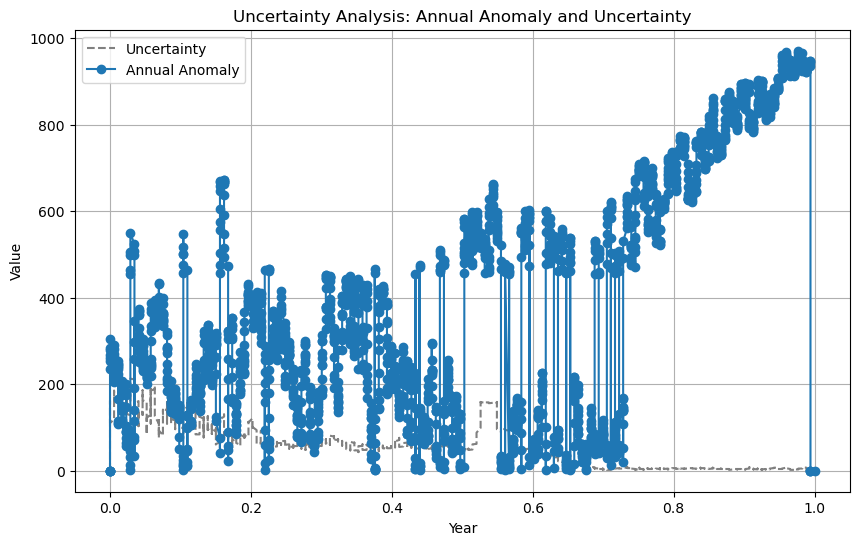

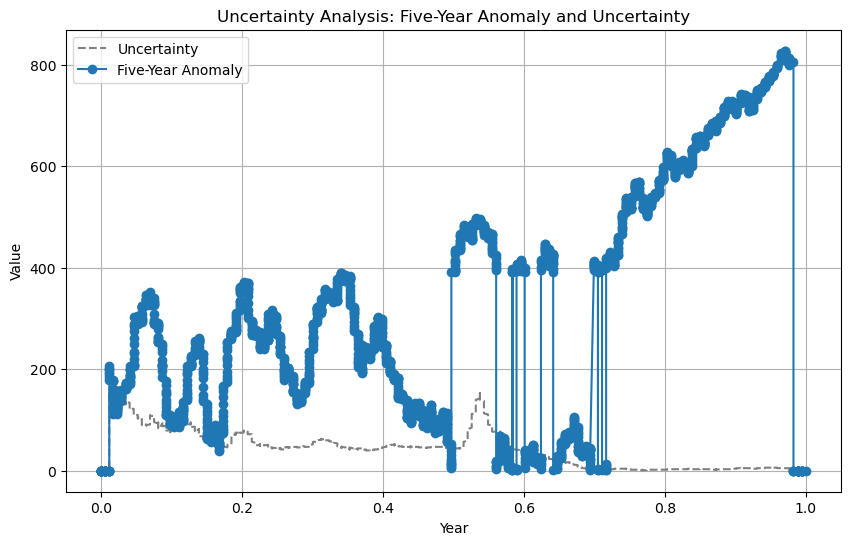

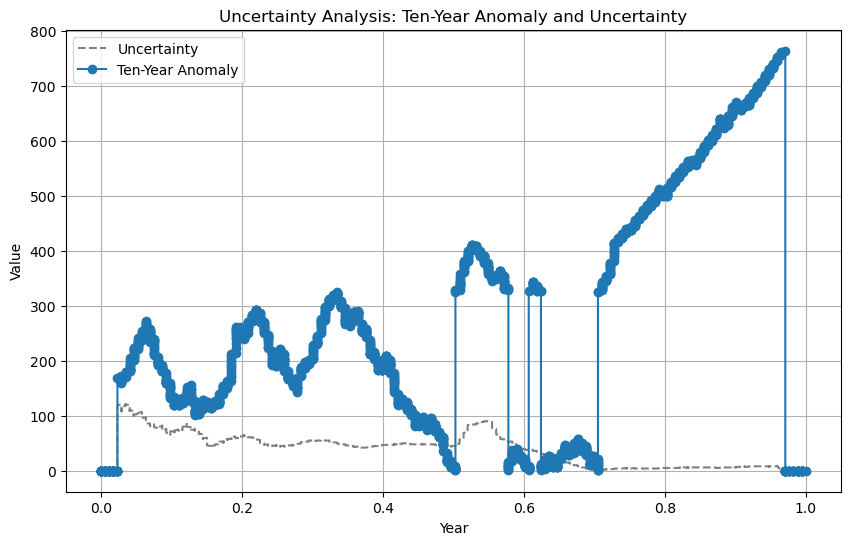

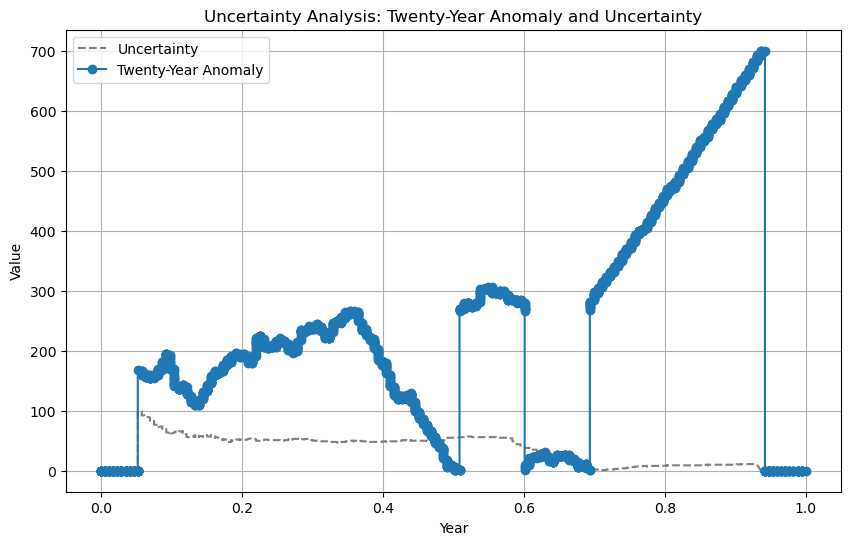

In [10]:
# perform Uncertainty Analysis by plotting uncertainties alongside anomalies for different time scales

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# UNCERTAINITY ANALYSIS
time_scales = ['Monthly', 'Annual', 'Five-Year', 'Ten-Year', 'Twenty-Year']
uncertainty_columns = ['Monthly Unc', 'Annual Unc', 'Five-Year Unc', 'Ten-Year Unc', 'Twenty-year Unc']

for scale, unc_column in zip(time_scales, uncertainty_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[unc_column], label='Uncertainty', color='gray', linestyle='--')
    plt.plot(df['Year'], df[f'{scale} Anomaly'], label=f'{scale} Anomaly', marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title(f'Uncertainty Analysis: {scale} Anomaly and Uncertainty')
    plt.legend()
    plt.grid()
    plt.show()


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


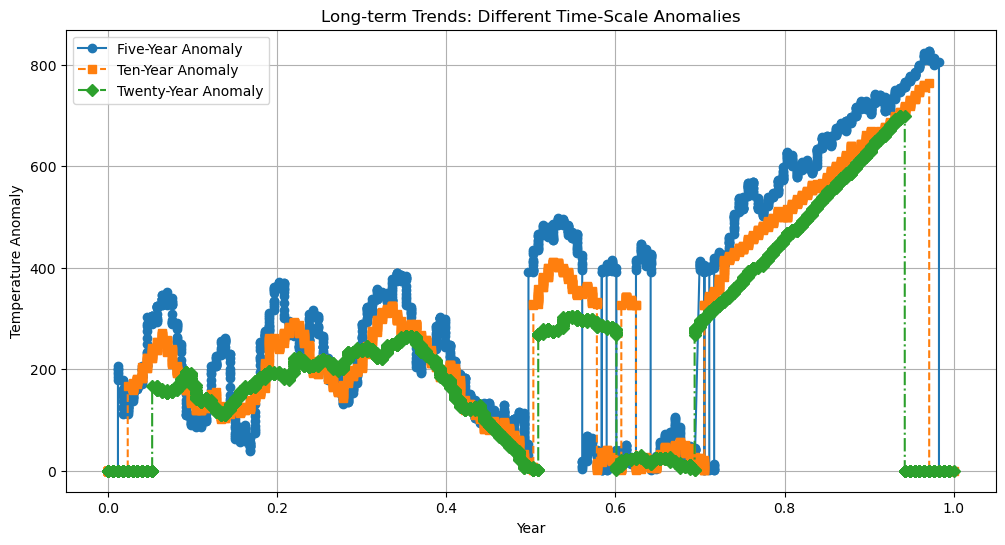

In [11]:
# perform Long-term Trends analysis by plotting different time-scale anomalies (five-year, ten-year, twenty-year) on 
#the same graph to visualize long-term trends


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# LONG TERM TRENDS: PLOT DIFFERENT TIME SCALE  ANOMALIES ON THE SAME GRAPH
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Five-Year Anomaly'], label='Five-Year Anomaly', marker='o', linestyle='-')
plt.plot(df['Year'], df['Ten-Year Anomaly'], label='Ten-Year Anomaly', marker='s', linestyle='--')
plt.plot(df['Year'], df['Twenty-Year Anomaly'], label='Twenty-Year Anomaly', marker='D', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Long-term Trends: Different Time-Scale Anomalies')
plt.legend()
plt.grid()
plt.show()


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


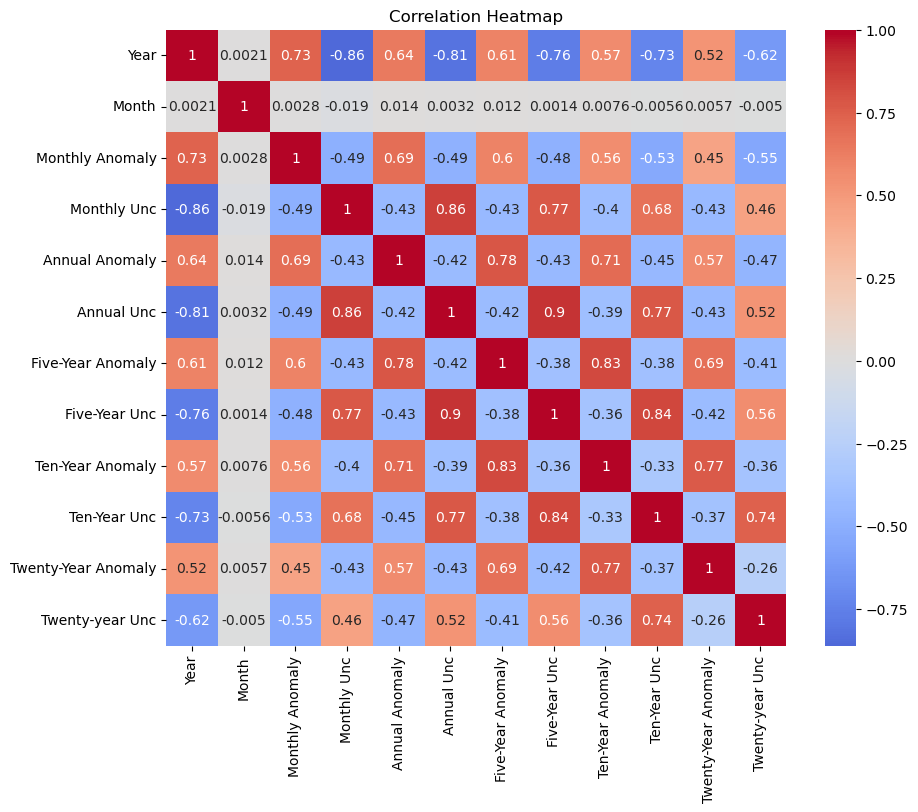

In [12]:
#correlations between different time-scale anomalies and other columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

#CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# CALCULATE CORRELATION
correlation_matrix = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


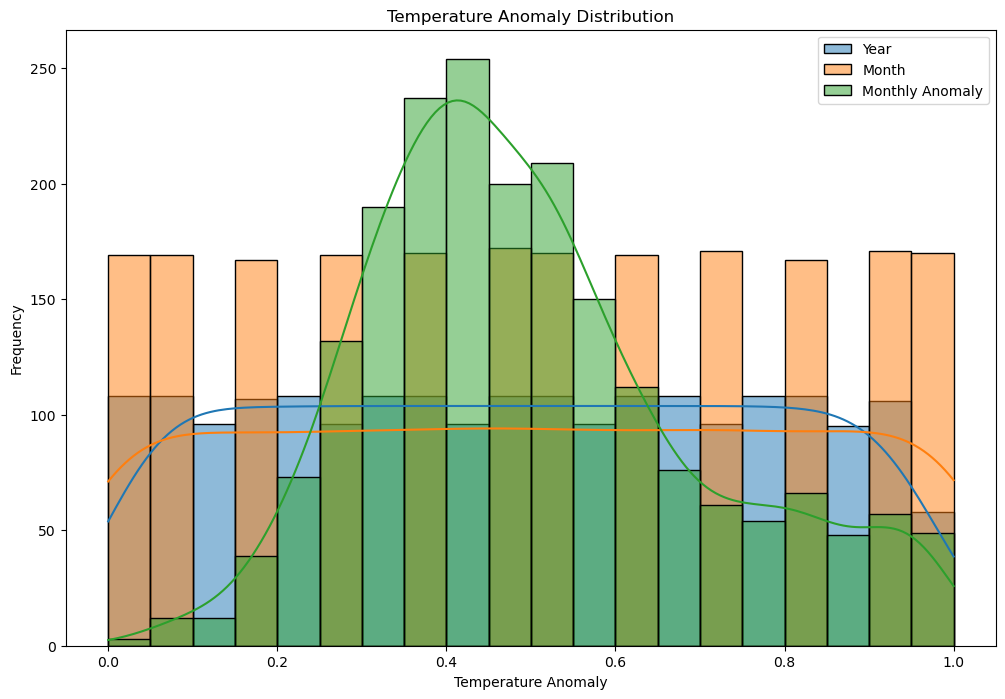

In [15]:

#histograms and kernel density plots to visualize the distribution of temperature anomalies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc',
                    'Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',
                    'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# DATA DISTRUBUTION VISUALIZATION
plt.figure(figsize=(12, 8))
for column in df_numeric_columns.columns:
    sns.histplot(df[column], kde=True, label=column, bins=20)
plt.xlabel('Temperature Anomaly')
plt.ylabel('Frequency')
plt.title('Temperature Anomaly Distribution')
plt.legend()
plt.show()


Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64


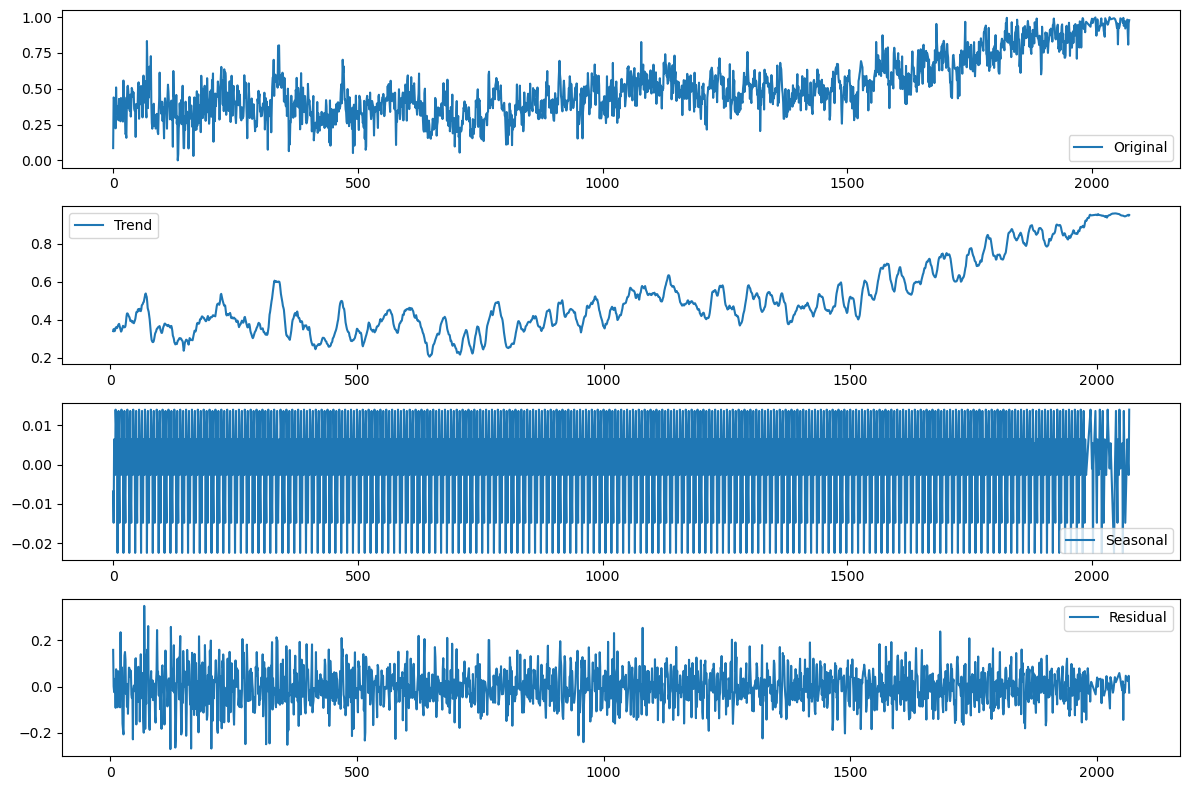

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc',
                    'Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',
                    'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# TIME SERIES DECOMPOSITION FOR "Monthly Anomaly" COLUMN
time_series = df['Monthly Anomaly']
result = seasonal_decompose(time_series, model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
#PERFORM SEASONAL FEATURE ENGINEERING 

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year','Month','Monthly Anomaly','Monthly Unc','Annual Anomaly','Annual Unc','Five-Year Anomaly','Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',  'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

#REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# SEASONAL FEATURE ENGINEERING 
df['Is_Spring'] = df['Month'].isin([3, 4, 5]).astype(int)
df['Is_Summer'] = df['Month'].isin([6, 7, 8]).astype(int)
df['Is_Fall'] = df['Month'].isin([9, 10, 11]).astype(int)
df['Is_Winter'] = df['Month'].isin([12, 1, 2]).astype(int)

time_periods = [3, 6, 12]
for period in time_periods:
    df[f'Moving_Avg_{period}mo'] = df['Monthly Anomaly'].rolling(window=period).mean()

# Drop rows with missing values after processing
df.dropna(inplace=True)

print("\nDataFrame after dropping rows with missing values:\n", df)


# Display missing values
missing_values_after_processing = df.isnull().sum()
print("\nMissing values count after processing:\n", missing_values_after_processing)



Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64

DataFrame after dropping rows with missing values:
          Year     Month  Monthly Anomaly  Monthly Unc  Annual Anomaly  \
11    0.00000  1.000000         0.280000          356             236   
12    0.00578  0.000000         0.429367          337             250   
13    0.00578  0.090909         0.356962          362             248   
14    0.00578  0.181818         0.324557          333             254   
15    0.00578  0.272727         0.272911          283             220   
...       ...       ...              ...          ...             ...   
2068  0.99422  0.363636         0.921013            0             935   
2072  0.99422  0.727273    

In [19]:
#perform random forest model

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# FUNCTION TO HANDLE OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\Global Earth Temperatures\Global Temperature.csv", encoding='latin1')

# FEATURE SELECTION
selected_columns = ['Year', 'Month', 'Monthly Anomaly', 'Monthly Unc', 'Annual Anomaly', 'Annual Unc',
                    'Five-Year Anomaly', 'Five-Year Unc', 'Ten-Year Anomaly', 'Ten-Year Unc',
                    'Twenty-Year Anomaly', 'Twenty-year Unc']
df = df[selected_columns]

# REMOVE LEADING AND TRAILING SPACES FROM COLUMNS NAME
df.columns = df.columns.str.strip()

# IDENTIFY MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values count:\n", missing_values)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# REMOVE DUPLICATE ROWS
df.drop_duplicates(inplace=True)

# DATA PREPROCESS
df_numeric_columns = df.select_dtypes(include='number')
df_categorical_columns = df.select_dtypes(include='object')

# LABEL ENCODING FOR CATEGORICAL COLUMNS
label_encoder = LabelEncoder()
df_categorical_columns = df_categorical_columns.apply(label_encoder.fit_transform)

# CONCATENATE NUMERIC AND LABEL ENCODED CATEGORICAL COLUMNS
df = pd.concat([df_numeric_columns, df_categorical_columns], axis=1)

# FILL MISSING VALUES WITH MEAN FOR NUMERIC COLUMNS AND MODE FOR CATEGORICAL COLUMNS
df.fillna(df.mean(), inplace=True)
for column in df_categorical_columns:
    df[column].fillna(df[column].mode().iloc[0], inplace=True)

# HANDLE OUTLIERS
numeric_columns = df_numeric_columns.columns
for column in numeric_columns:
    df = handle_outliers(df, column)

# NORMALIZE AND SCALING NUMERIC COLUMNS
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# SEASONAL FEATURE ENGINEERING
df['Is_Spring'] = df['Month'].isin([3, 4, 5]).astype(int)
df['Is_Summer'] = df['Month'].isin([6, 7, 8]).astype(int)
df['Is_Fall'] = df['Month'].isin([9, 10, 11]).astype(int)
df['Is_Winter'] = df['Month'].isin([12, 1, 2]).astype(int)

time_periods = [3, 6, 12]
for period in time_periods:
    df[f'Moving_Avg_{period}mo'] = df['Monthly Anomaly'].rolling(window=period).mean()
    
# Drop rows with missing values after processing
df.dropna(inplace=True)

# TRAIN-TEST SPLIT
X = df.drop('Is_Summer', axis=1)
y = df['Is_Summer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOM FOREST MODEL
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# PREDICTIONS
y_pred = model.predict(X_test)

# EVALUATION
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Missing values count:
 Year                   0
Month                  0
Monthly Anomaly        0
Monthly Unc            0
Annual Anomaly         0
Annual Unc             0
Five-Year Anomaly      0
Five-Year Unc          0
Ten-Year Anomaly       0
Ten-Year Unc           0
Twenty-Year Anomaly    0
Twenty-year Unc        0
dtype: int64
Accuracy: 1.00
